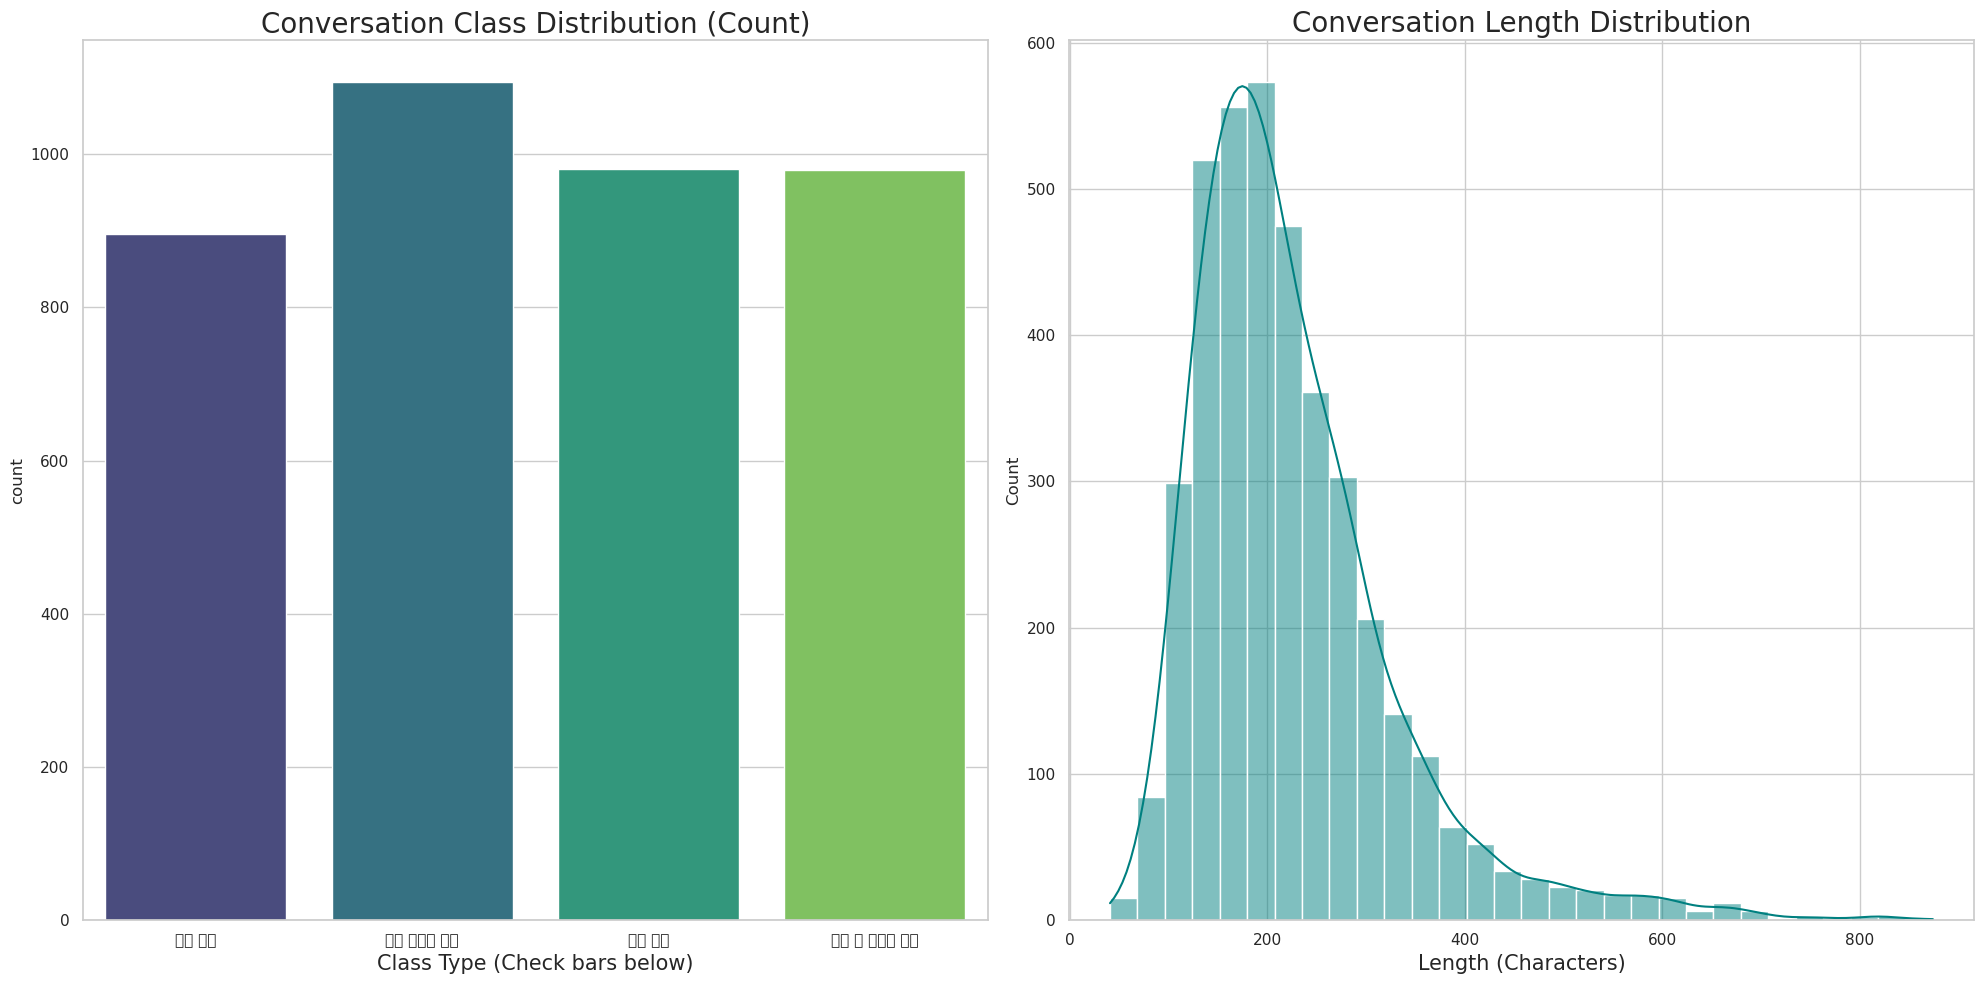


✅ 전체 데이터 수: 3950개
✅ 평균 글자 수: 226.6자 | 최대: 874자
--------------------------------------------------
각 클래스별 데이터 개수:
class
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: count, dtype: int64


In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display, HTML

# 1. 스크롤 제거 및 설정
warnings.filterwarnings('ignore')
display(HTML("<style>.output_scroll { height: auto !important; max-height: none !important; }</style>"))
sns.set_theme(style="whitegrid")

# 2. 파일 로드
file_path = os.path.expanduser('~/aiffel/dktc/data/train.csv')

try:
    df = pd.read_csv(file_path)
    df['text_len'] = df['conversation'].apply(len)

    # 3. 그래프 그리기 (한 화면에 크게!)
    # 가로를 20, 세로를 10으로 설정하여 화면에 꽉 차게 만듭니다.
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # [왼쪽] 클래스 분포 (원본 데이터 그대로 사용하여 오류 방지)
    # 데이터에 있는 한글 그대로 막대를 그립니다. 글자가 깨져도 막대 개수는 보입니다!
    sns.countplot(data=df, x='class', hue='class', palette='viridis', ax=axes[0], legend=False)
    axes[0].set_title('Conversation Class Distribution (Count)', fontsize=20)
    axes[0].set_xlabel('Class Type (Check bars below)', fontsize=15)

    # [오른쪽] 대화 길이 분포 (이미 잘 나오고 있는 코드 유지)
    sns.histplot(df['text_len'], bins=30, kde=True, color='teal', ax=axes[1])
    axes[1].set_title('Conversation Length Distribution', fontsize=20)
    axes[1].set_xlabel('Length (Characters)', fontsize=15)

    plt.tight_layout()
    plt.show()

    # 4. 요약 수치 (스크롤 없이 바로 확인 가능)
    print("\n" + "="*50)
    print(f"✅ 전체 데이터 수: {len(df)}개")
    print(f"✅ 평균 글자 수: {df['text_len'].mean():.1f}자 | 최대: {df['text_len'].max()}자")
    print("-" * 50)
    print("각 클래스별 데이터 개수:")
    print(df['class'].value_counts())
    print("="*50)

except Exception as e:
    print(f"❌ 에러 발생: {e}")

In [16]:
# 중복된 대화 확인 및 제거
before_cnt = len(df)
df = df.drop_duplicates(subset=['conversation']).reset_index(drop=True)
after_cnt = len(df)

print(f"제거된 중복 데이터 수: {before_cnt - after_cnt}개")
print(f"최종 데이터 수: {after_cnt}개")

제거된 중복 데이터 수: 104개
최종 데이터 수: 3846개


In [5]:
# 텍스트 데이터 정제
# 중복 데이터 확인
duplicate_count = train_df.duplicated(subset=['conversation']).sum()
print(f"중복된 대화 데이터 개수: {duplicate_count}")

# 중복 데이터 제거
train_df = train_df.drop_duplicates(subset=['conversation']).reset_index(drop=True)
print("중복 제거 후 전체 데이터 개수:", len(train_df))